In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import silhouette_score, accuracy_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from keras import backend as K 
from unidecode import unidecode
import optuna
pd.set_option('display.max_columns', None)
import warnings 
import re
warnings.filterwarnings('ignore')
from langdetect import detect 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
nltk.download('stopwords')
import os
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aladelca/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aladelca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
os.chdir('/Users/aladelca/Library/CloudStorage/OneDrive-McGillUniversity/MMA/Data mining and visualization/group_assignment/repo/INSY_662_MMA')

## Clustering

In [105]:
## Modelling

data = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


In [52]:
### Standarization

CLUSTER_VARS = ['liveness','acousticness','energy','instrumentalness','loudness','speechiness','tempo','duration','danceability']

esc = StandardScaler()

data_esc = esc.fit_transform(data[CLUSTER_VARS])




In [53]:
### Clustering

inertias = []
silhouettes = []
for i in np.arange(2,21):
    model = KMeans(n_clusters=i)
    model.fit(data_esc)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(data_esc, model.labels_))
    #data['cluster_kmeans'] = model.labels_

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

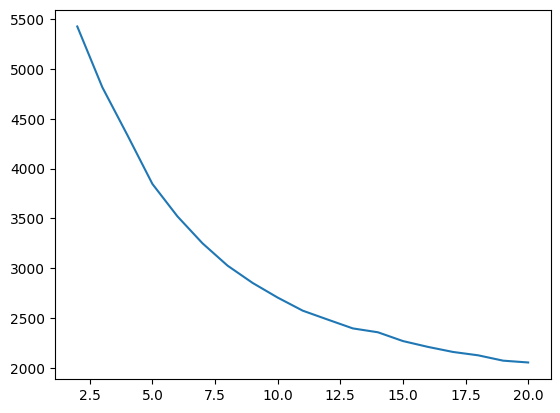

In [63]:
sns.lineplot(x = np.arange(2,21), y = np.array(inertias))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

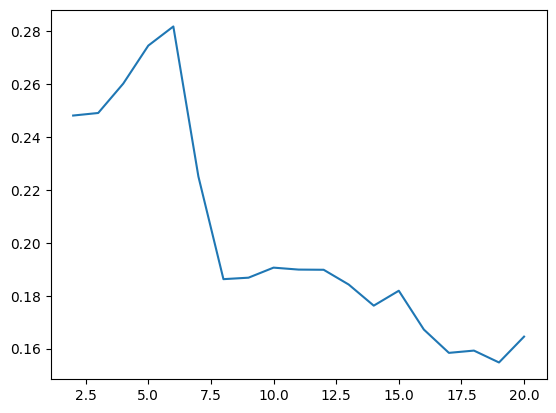

In [55]:
sns.lineplot(x = np.arange(2,21), y = silhouettes)

In [64]:
### Number of clusters 

n = 6

model = KMeans(n_clusters=6)
model.fit(data_esc)
data['kmeans_cluster'] = model.labels_

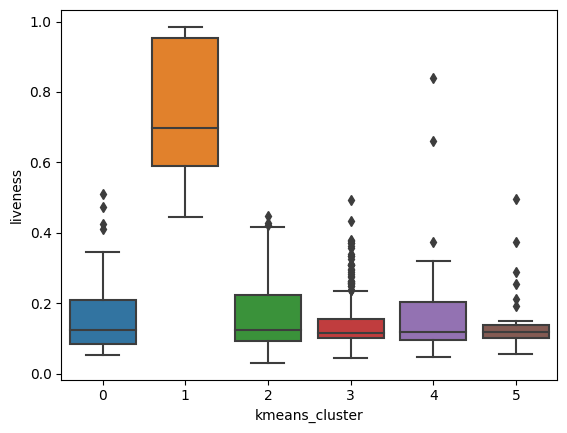

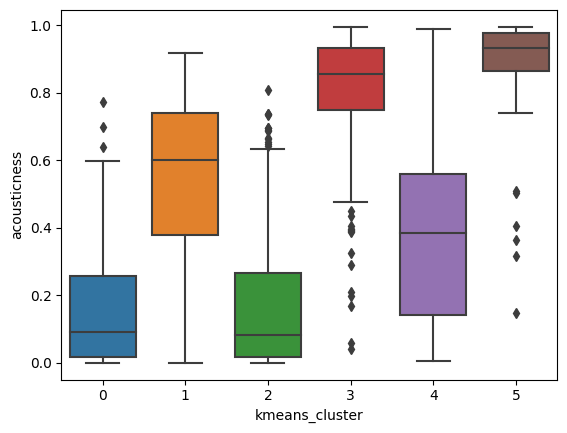

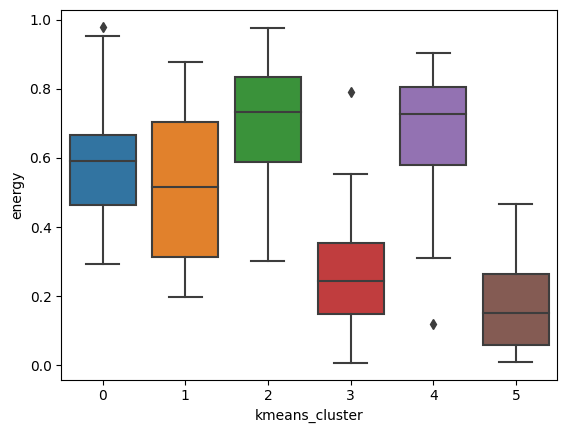

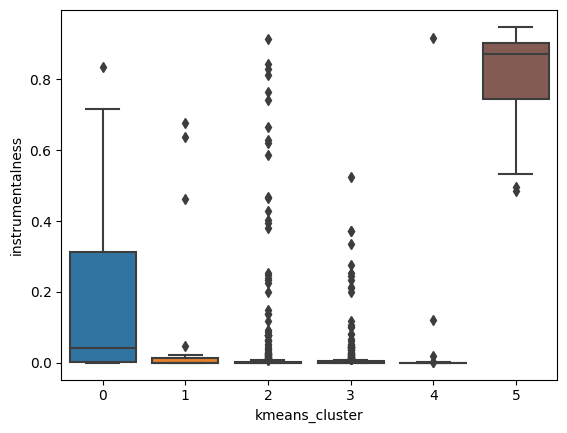

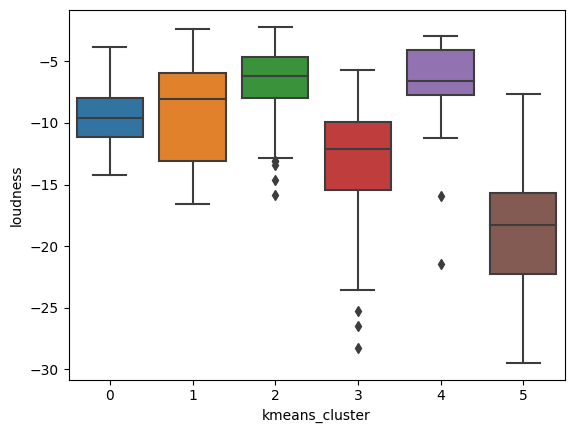

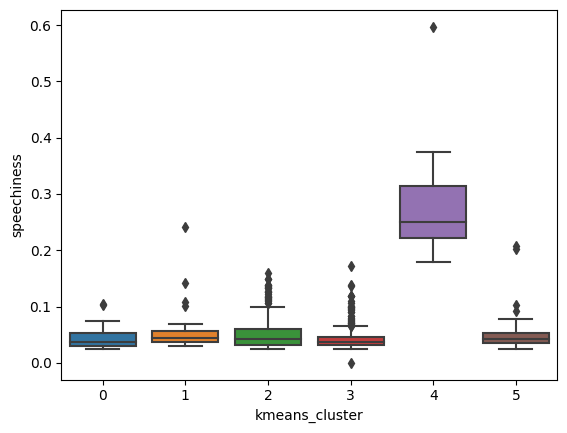

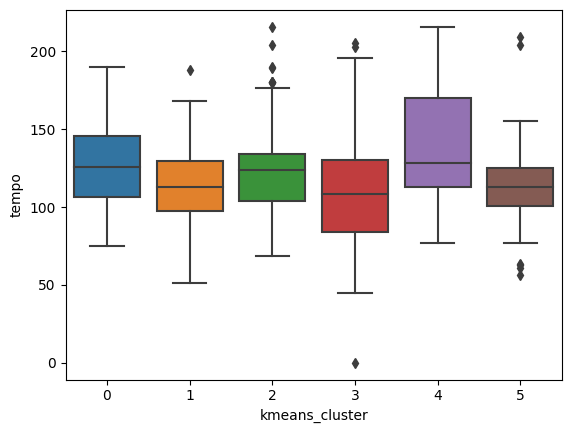

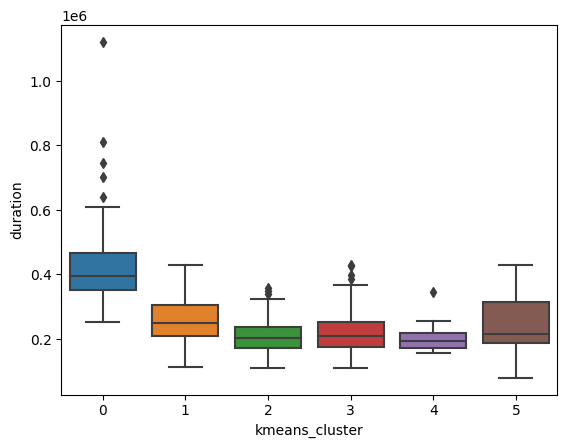

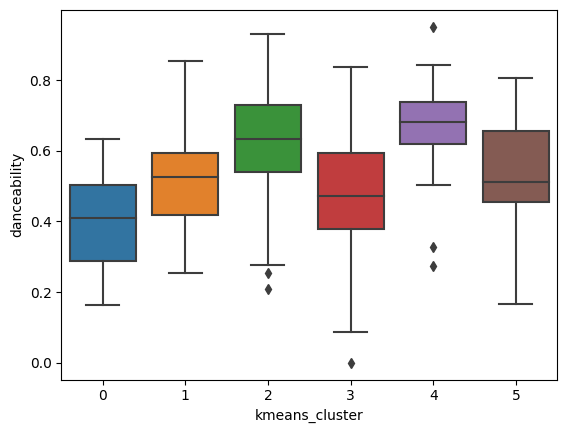

In [65]:
for i in CLUSTER_VARS:
    sns.boxplot(y = data[i], x = data['kmeans_cluster'])
    plt.show()

In [48]:
### Songs

data[data['kmeans_cluster']==5]

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,Polarity,Subjectivity,cluster_kmeans,kmeans_cluster
75,1jDJFeK9x3OZboIAHsY9k2,I'm Still Standing,Elton John,183440,85,0.504,0.35600,0.904,0.121000,0.1400,-6.863,0.179,176.808,0.165000,0.592976,7,5
109,6f3Slt0GbA2bPZlz0aIFXN,The Business,Tiësto,164000,79,0.798,0.41400,0.620,0.019200,0.1120,-7.079,0.232,120.031,-0.058712,0.495833,7,5
123,1xNcBAoUw8Hz6LqK2jt4Ff,Call on Me - Radio Mix,Eric Prydz,171360,77,0.597,0.00427,0.837,0.001150,0.8390,-6.518,0.375,126.342,0.000000,0.300000,5,5
125,4w8niZpiMy6qz1mntFA5uM,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,212500,76,0.842,0.15700,0.801,0.000005,0.0642,-4.167,0.228,95.881,-0.268333,0.683333,7,5
130,6osaMSJh9NguagEDQcZaKx,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,185194,75,0.694,0.27800,0.758,0.000001,0.1020,-2.986,0.218,192.091,-0.377778,0.466667,7,5
143,0Ftrkz2waaHcjKb4qYvLmz,Delilah (pull me out of this),Fred again..,250702,71,0.685,0.13800,0.827,0.002070,0.3740,-7.745,0.224,133.930,0.208611,0.708056,7,5
215,5c9VRWQx5E5sts3teTBweL,Jazz Cafe,Instrumental Jazz Music Ambient,195555,8,0.567,0.98900,0.120,0.916000,0.1080,-21.429,0.358,215.465,0.304754,0.689692,7,5
311,4jekudehBwLkmmf5TP8zjd,"A-Tisket, A-Tasket",Ella Fitzgerald,158786,0,0.642,0.85900,0.388,0.000000,0.2480,-10.000,0.241,165.074,0.007425,0.308647,7,5
373,30lxDCj66HzjqA4J4cFGez,"Hallelujah, I Love Him So",Ella Fitzgerald,155586,0,0.327,0.76500,0.884,0.000001,0.0928,-6.040,0.207,76.822,0.294944,0.515816,7,5
380,07wpUwUPfMWMlLYQuwHj2M,Honeysuckle Rose,Ella Fitzgerald,162053,0,0.711,0.78000,0.378,0.000000,0.1560,-11.213,0.218,94.573,0.471429,0.764286,7,5


## Predicting song's mood

In [3]:
data = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


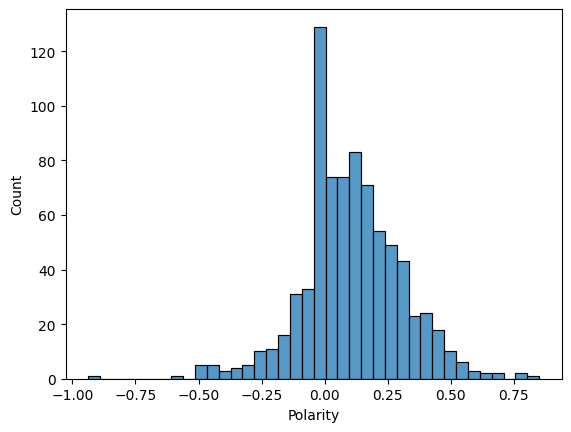

0.85


,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment
401,2IhTNWQ9sFAr4WsfDpIy4s,Inseparable,Natalie Cole,149106,0,0.443,0.8550,0.194,0.000125,0.1800,-12.644,0.0366,125.145,0.258,0.80,0.833333,5.0
462,5M4yti0QxgqJieUYaEXcpw,Eventually,Tame Impala,318591,78,0.424,0.0158,0.615,0.000389,0.0844,-6.217,0.0325,77.935,0.155,0.80,1.000000,5.0
633,4Jn1rVpnfFfpuSBLDTNJv8,Proclamation,Gentle Giant,416866,39,0.514,0.1110,0.427,0.008120,0.1270,-14.254,0.0717,115.120,0.371,0.85,0.600000,5.0


In [50]:
sns.histplot(data['Polarity'])
plt.show()
print(data['Polarity'].max())

data[data['Polarity']>0.70]

In [51]:
## Creating dependent variables

bins = pd.IntervalIndex.from_tuples([
    (-1, -0.67),
    (-0.67, -0.34),
    (-0.34, 0),
    (0, 0.33),
    (0.33, 0.66),
    (0.66, 1)
])
n = len(bins)
data['sentiment'] = pd.cut(data['Polarity'],bins)

In [6]:
enc = OrdinalEncoder()
data['sentiment'] = enc.fit_transform(data[['sentiment']])[:,0]
data = data.drop(['language'], axis = 1)

In [7]:
original_data = pd.read_excel('data/dataset.xlsx')

delete_text_before_lyrics = lambda x: x[x.find("Lyrics") + len("Lyrics"):] if x.find("Lyrics") != -1 else x

original_data['lyrics'] = original_data['lyrics'].apply(delete_text_before_lyrics)

original_data['language'] = original_data['lyrics'].apply(detect)  # Detect the language

original_data.head()

,Unnamed: 0,id,name,artist,disc,duration,episode,explicit,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics,language
0,0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,1,0.0295,109.001,4,0.187,"When you feel you're alone, cut off from this ...",en
1,1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,1,0.0261,74.984,4,0.222,"\nTurn away\nIf you could, get me a drink\nOf ...",en
2,2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,1,0.0278,76.426,4,0.118,\nA heart that's full up like a landfill\nA jo...,en
3,3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,1,0.1230,179.722,4,0.255,"\n\nWell, if you wanted honesty\nThat's all yo...",en
4,4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,1,0.0525,73.019,4,0.327,"\nShe sits up high, surrounded by the sun\nOne...",en


In [8]:
data_pre = data.merge(original_data[['id','lyrics','language']], how = 'left', on = ['id'])
data_pre = data_pre.drop_duplicates()

data_pre = data_pre[data_pre['language'].isin(['es','en','fr'])]

data_pre['lyrics'] = data_pre['lyrics'].astype(str).str.lower()
data_pre['lyrics'] = data_pre['lyrics'].apply(unidecode)
regexp = RegexpTokenizer('\w+')

data_pre['lyrics_token'] = data_pre['lyrics'].apply(regexp.tokenize)
data_pre.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment,lyrics,language,lyrics_token
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,0.141837,0.752551,3.0,"when you feel you're alone, cut off from this ...",en,"[when, you, feel, you, re, alone, cut, off, fr..."
2,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,-0.067330,0.678125,2.0,"\nturn away\nif you could, get me a drink\nof ...",en,"[turn, away, if, you, could, get, me, a, drink..."
4,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,-0.036364,0.630303,2.0,\na heart that's full up like a landfill\na jo...,en,"[a, heart, that, s, full, up, like, a, landfil..."
6,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,0.259333,0.536667,3.0,"\n\nwell, if you wanted honesty\nthat's all yo...",en,"[well, if, you, wanted, honesty, that, s, all,..."
8,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,0.177059,0.499412,3.0,"\nshe sits up high, surrounded by the sun\none...",en,"[she, sits, up, high, surrounded, by, the, sun..."


In [9]:


def tokenizing(data):
    stopwords_en = nltk.corpus.stopwords.words("english")
    stopwords_es = nltk.corpus.stopwords.words("spanish")
    stopwords_fr = nltk.corpus.stopwords.words("french")
    data_en = data[data['language']=='en']
    data_en['lyrics_token'] = data_en['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_en])
    data_es = data[data['language']=='es']
    data_es['lyrics_token'] = data_es['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_es])
    data_fr = data[data['language']=='fr']
    data_fr['lyrics_token'] = data_fr['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_fr])
    final = pd.concat([data_en,data_es, data_fr], axis = 0)
    return final

In [10]:
data_token = tokenizing(data_pre)

lemmatizer = WordNetLemmatizer()
data_token['lyrics_token'] = data_token['lyrics_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
data_token['lyrics'] = data_token['lyrics_token'].apply(lambda x: ' '.join([item for item in x]))

pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
def replace_numbers(x):
    new_string = re.sub(pattern, '', x)
    return new_string
data_token['lyrics'] = data_token['lyrics'].apply(replace_numbers)
data_token.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment,lyrics,language,lyrics_token
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,0.141837,0.752551,3.0,feel alone cut cruel world instinct telling ru...,en,"[feel, alone, cut, cruel, world, instinct, tel..."
2,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,-0.067330,0.678125,2.0,turn away could get drink water cause lip chap...,en,"[turn, away, could, get, drink, water, cause, ..."
4,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,-0.036364,0.630303,2.0,heart full like landfill job slowly kill bruis...,en,"[heart, full, like, landfill, job, slowly, kil..."
6,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,0.259333,0.536667,3.0,well wanted honesty say never want let go bett...,en,"[well, wanted, honesty, say, never, want, let,..."
8,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,0.177059,0.499412,3.0,sits high surrounded sun one million branch lo...,en,"[sits, high, surrounded, sun, one, million, br..."


In [11]:
VARS = ['artist','duration','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','language','lyrics']
TARGET = ['sentiment']

x = data_token[VARS]
y = data_token[TARGET]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)
y_train = np.array(y_train, dtype=int) - 1
y_test = np.array(y_test, dtype=int) - 1
x_train = x_train.rename(columns = {'artist':'artist_song'})
x_test = x_test.rename(columns = {'artist':'artist_song'})

In [12]:
#### Handling text

vect = TfidfVectorizer(max_features = 1000,ngram_range=(1,3))
x_train_lyrics = pd.DataFrame(vect.fit_transform(x_train['lyrics']).toarray(), columns  = vect.get_feature_names_out(), index = x_train.index)
x_test_lyrics = pd.DataFrame(vect.transform(x_test['lyrics']).toarray(), columns  = vect.get_feature_names_out(), index = x_test.index)

x_train_final = pd.concat([x_train, x_train_lyrics], axis = 1)
x_test_final = pd.concat([x_test, x_test_lyrics], axis = 1)



In [13]:
EXCLUDED_VARS = ['lyrics']
x_train_df = x_train_final.loc[:,~x_train_final.columns.isin(EXCLUDED_VARS)]
x_test_df = x_test_final.loc[:,~x_test_final.columns.isin(EXCLUDED_VARS)]
x_train_df.head()

,artist_song,duration,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,across,act,action,actually,age,ago,ah,ah ah,ah ah ah,air,album,alive,almost,alone,along,already,alright,also,also like,also likeembed,always,america,american,among,amor,angel,angela,another,answer,anyone,anything,ap,apart,april,april th,arm,around,art,artist,as,aseptember,ask,asked,attention,august,august th,away,away give,away give away,ay,ba,ba ba,ba ba ba,baby,back,bad,bag,ball,band,bank,bar,battle,beach,bear,beat,beatles,beautiful,beauty,bebe,became,become,bed,begala,began,begin,behind,believe,bell,best,better,beyond,bien,big,bill,bird,bit,bitch,black,blood,bloody,bloom,blow,blue,bob,body,bone,book,born,box,boy,brain,break,breath,bridge,bright,bring,broke,broken,brother,brought,brown,business,buy,ca,caesar,call,call call,called,came,cannot,captain,car,care,carlson,carti,case,cat,catch,cause,certain,chain,chair,chance,change,check,child,chorus,chris,christmas,chuck,city,class,classic,clean,clear,close,clothes,cloud,club,coffee,cold,come,coming,comme,control,cool,corner,could,country,course,court,cover,crazy,cried,crosstalk,crowd,cry,cut,da,da da,da da da,dad,daddy,damn,dan,dance,dancing,dark,darling,dat,daughter,david,day,de,dead,dear,death,december,decent,decent strong,deep,desire,devil,diamond,die,died,dientes,different,dirty,dj,doctor,dog,doll,dollar,done,door,dr,drake,dream,dress,drink,drive,drop,drunk,du,du du,du du du,dude,dum,ear,early,earn,earth,east,easy,eat,ed,eh,either,el,element,elliot,else,em,embed,end,english,enough,ep,er,etait,etre,even,evening,ever,every,everybody,everyone,everything,evil,ey,eye,face,fact,fair,fait,fall,falling,family,famous,far,fast,father,fear,feat,feat joel,feat joel sattler,february,february th,feel,feel like,feeling,fell,fellow,felt,field,fight,figure,find,fine,finger,fire,first,five,flame,floor,flow,flower,fly,food,fool,foot,force,forever,forget,form,forth,forward,found,four,free,fresh,friday,friend,front,ft,fuck,fuckin,full,fun,future,game,garden,gatsby,gave,general,gentleman,get,getting,ghost,gillis,girl,give,give away,give away give,given,glass,go,go go,god,goin,going,gold,golden,gone,gonna,good,goodbye,got,gotta,grand,great,greatest,green,ground,group,guess,gun,guy,ha,hail,hair,half,hall,hand,happen,happened,happy,hard,harlem,hat,hate,hath,head,hear,heard,heart,heaven,held,hell,hello,help,hey,high,hill,hip,hip hop,history,hit,ho,hold,holding,hole,holiday,holy,home,honey,hop,hope,horse,hot,hotel,hour,house,however,hoy,human,hundred,hurt,ice,idea,ii,indeed,infinity,inside,int,island,jack,james,january,january rd,january st,january th,jay,jazz,jimmy,job,joe,joel,joel sattler,john,jordan,joy,judge,july,july th,june,june th,kanye,kanye west,keep,kendrick,kendrick lamar,key,kid,kill,killer,kind,king,kiss,knee,knew,know,known,la,la la,la la la,lady,lamar,land,large,lars,last,late,later,laugh,laughter,law,lawrence,lay,le,lead,leaf,least,leave,leaving,led,left,leg,let,let go,letter,li,lie,life,light,light decent,like,likeembed,lil,line,lip,list,listen,listening,little,live,liveget,liveget ticket,liveget ticket low,livin,living,lonely,long,look,look like,looked,looking,lord,lose,lost,lot,lou,loud,love,love love,love love love,loved,lovely,lover,low,low you,low you might,lucky,lyric,ma,mac,macbeth,machine,mad,made,magic,main,make,making,malachy,man,manny,many,mar,march,march th,margaret,marianela,marianela marianela,marianela marianela marianela,mark,master,matter,max,may,may th,maybe,mean,meant,meet,meme,memory,men,met,michael,middle,might,might also,might also like,might also likeembed,mike,mile,milk,million,mind,mine,minute,miranda,miss,mma,modern,moment,money,monster,month,moon,morel,morning,mother,motion,mountain,mouth,move,movement,mr,mr bloom,much,murder,music,must,na,na na,na na na,name,nation,natural,nature,nd,near,need,negro,never,new,new york,news,next,nice,nigga,night,nobody,noche,norma,north,note,nothing,november,number,ocean,october,october th,office,oh,oh

In [23]:
### Modeling

CAT_VARS = ['artist_song','language']
x_train_df[CAT_VARS] = x_train_df[CAT_VARS].astype('category')
x_test_df[CAT_VARS] = x_test_df[CAT_VARS].astype('category')
model = CatBoostClassifier(cat_features=CAT_VARS)
model_lgbm = lgb.LGBMClassifier(categorical_feature = CAT_VARS)
model_xgb = XGBClassifier(enable_categorical=True)
model_rf = RandomForestClassifier(random_state=123)
model_xgb.fit(x_train_df, y_train)
model_lgbm.fit(x_train_df, y_train)
model.fit(x_train_df, y_train)
model_rf.fit(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)], y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] categorical_feature is set=artist_song,language, categorical_column=0,11 will be ignored. Current value: categorical_feature=artist_song,language
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18698
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 850
[LightGBM] [Info] Start training from score -3.901973
[LightGBM] [Info] Start training from score -1.171944
[LightGBM] [Info] Start training from score -0.606136
[LightGBM] [Info] Start training from score -2.138384
[LightGBM] [Info] Start training from score -5.000585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

RandomForestClassifier(random_state=123)

In [25]:
preds_catboost = model.predict(x_test_df)
preds_probas_catboost = model.predict_proba(x_test_df)
preds_probas_train_catboost = model.predict_proba(x_train_df)
preds_lgbm = model_lgbm.predict(x_test_df)
preds_probas_lgbm = model_lgbm.predict_proba(x_test_df)
preds_probas_train_lgbm = model_lgbm.predict_proba(x_train_df)

preds_xgb = model_xgb.predict(x_test_df)
preds_probas_xgb = model_xgb.predict_proba(x_test_df)
preds_probas_train_xgb = model_xgb.predict_proba(x_train_df)

preds_rf = model_rf.predict(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
preds_probas_rf = model_rf.predict_proba(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
preds_probas_train_rf = model_rf.predict_proba(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)])


print(accuracy_score(preds_catboost, y_test))
print(accuracy_score(preds_lgbm, y_test))
print(accuracy_score(preds_xgb, y_test))
print(accuracy_score(preds_rf, y_test))

0.7035175879396985
0.628140703517588
0.6633165829145728
0.6733668341708543


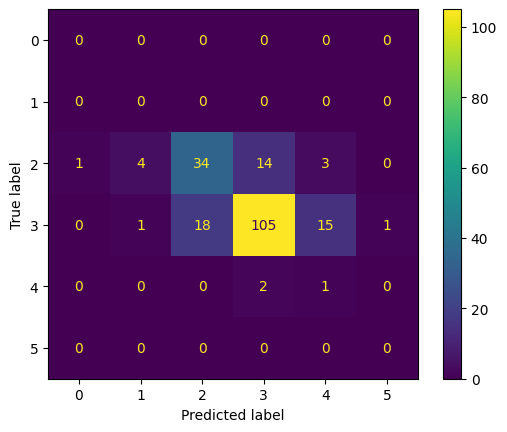

In [44]:
cm_catboost = confusion_matrix(preds_catboost, y_test)
disp = ConfusionMatrixDisplay(cm_catboost)
disp.plot()
plt.show()

In [40]:
## Stacked model

df_probas_train = pd.concat([pd.DataFrame(preds_probas_train_catboost, columns = [f'catboost_{i}' for i in range(5)]),
pd.DataFrame(preds_probas_train_lgbm, columns = [f'lgbm_{i}' for i in range(5)]),
pd.DataFrame(preds_probas_train_xgb, columns = [f'xgb_{i}' for i in range(5)]),
pd.DataFrame(preds_probas_train_rf, columns = [f'rf_{i}' for i in range(5)])], axis = 1)

df_probas_test = pd.concat([pd.DataFrame(preds_probas_catboost, columns = [f'catboost_{i}' for i in range(5)]),
pd.DataFrame(preds_probas_lgbm, columns = [f'lgbm_{i}' for i in range(5)]),
pd.DataFrame(preds_probas_xgb, columns = [f'xgb_{i}' for i in range(5)]),
pd.DataFrame(preds_probas_rf, columns = [f'rf_{i}' for i in range(5)])], axis = 1)

linear_model = LogisticRegression(penalty='l2', solver = 'saga', C = 0.05)

linear_model.fit(df_probas_train, y_train)
preds = linear_model.predict(df_probas_test)
accuracy_score(preds, y_test)


0.678391959798995

In [154]:
esc = StandardScaler()
x_train_esc = esc.fit_transform(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)])
x_test_esc = esc.transform(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
x_train_esc.shape

(594, 1010)

In [187]:
#### CNN

K.clear_session()
model = Sequential()
# Convolutional layers
model.add(Dense(1000, input_shape=(x_train_esc.shape[1],), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='softmax')) 
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100000)            101100000 
                                                                 
 dense_1 (Dense)             (None, 10000)             1000010000
                                                                 
 dense_2 (Dense)             (None, 128)               1280128   
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1102398449 (4.11 GB)
Trainable params: 1102398449 (4.11 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [188]:
model.fit(x_train_esc, y_train,  epochs=20, batch_size=32)

Epoch 1/20


In [182]:
preds_cnn = model.predict(x_test_esc)
preds_cats = []
for i in preds_cnn:
    preds_cats.append(np.argmax(i))

accuracy_score(preds_cats, y_test)

7/7 [==============================] - 0s 2ms/step


0.07537688442211055

In [49]:
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.00001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 4000),
        # Add other hyperparameters as needed
    }

    model = XGBClassifier(enable_categorical=True, *params)
    model.fit(x_train_df, y_train)
    predictions = model.predict(x_test_df)
    accuracy = accuracy_score(predictions, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=40)

[I 2023-11-22 01:14:25,609] A new study created in memory with name: no-name-43af904e-e182-4b65-878b-3c6e33823390
[I 2023-11-22 01:14:31,581] Trial 0 finished with value: 0.6633165829145728 and parameters: {'max_depth': 7, 'learning_rate': 0.00041191619466161573, 'n_estimators': 1724}. Best is trial 0 with value: 0.6633165829145728.
[I 2023-11-22 01:14:36,982] Trial 1 finished with value: 0.6633165829145728 and parameters: {'max_depth': 9, 'learning_rate': 0.5469093563352341, 'n_estimators': 1475}. Best is trial 0 with value: 0.6633165829145728.
[I 2023-11-22 01:14:41,759] Trial 2 finished with value: 0.6633165829145728 and parameters: {'max_depth': 7, 'learning_rate': 0.00030446335555104714, 'n_estimators': 2263}. Best is trial 0 with value: 0.6633165829145728.
[I 2023-11-22 01:14:47,193] Trial 3 finished with value: 0.6633165829145728 and parameters: {'max_depth': 3, 'learning_rate': 0.00046054661740183516, 'n_estimators': 1735}. Best is trial 0 with value: 0.6633165829145728.
[I 202

In [103]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 4000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.3),

        # Add other hyperparameters as needed
    }

    model = CatBoostClassifier(**params, silent=True, cat_features=CAT_VARS)
    model.fit(x_train_df, y_train)
    predictions = model.predict(x_test_df)
    accuracy = accuracy_score(predictions, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)

[I 2023-11-21 00:56:35,036] A new study created in memory with name: no-name-ec4584d2-978c-4092-a653-3a3de7e43fe9
[I 2023-11-21 01:00:46,867] Trial 0 finished with value: 0.6582914572864321 and parameters: {'iterations': 1651, 'depth': 9, 'learning_rate': 0.29253428889453814}. Best is trial 0 with value: 0.6582914572864321.
[I 2023-11-21 01:03:14,127] Trial 1 finished with value: 0.628140703517588 and parameters: {'iterations': 3145, 'depth': 7, 'learning_rate': 0.2847158387967534}. Best is trial 0 with value: 0.6582914572864321.
[I 2023-11-21 01:04:08,335] Trial 2 finished with value: 0.592964824120603 and parameters: {'iterations': 1147, 'depth': 7, 'learning_rate': 0.00564545419395236}. Best is trial 0 with value: 0.6582914572864321.
[I 2023-11-21 01:05:22,181] Trial 3 finished with value: 0.6532663316582915 and parameters: {'iterations': 2843, 'depth': 5, 'learning_rate': 0.18430791659872514}. Best is trial 0 with value: 0.6582914572864321.
[I 2023-11-21 01:05:48,131] Trial 4 finis

KeyboardInterrupt: 

In [107]:
params = {'iterations': 1786, 'depth': 9, 'learning_rate': 0.29666741441737854}
model = CatBoostClassifier(cat_features=CAT_VARS, **params)
model.fit(x_train_df, y_train)
preds_catboost = model.predict(x_test_df)
print(accuracy_score(preds_catboost, y_test))

0:	learn: 1.3890641	total: 231ms	remaining: 6m 52s
1:	learn: 1.2425489	total: 403ms	remaining: 5m 59s
2:	learn: 1.1573241	total: 606ms	remaining: 6m
3:	learn: 1.0952804	total: 792ms	remaining: 5m 53s
4:	learn: 1.0324755	total: 954ms	remaining: 5m 39s
5:	learn: 0.9940243	total: 1.19s	remaining: 5m 52s
6:	learn: 0.9601732	total: 1.42s	remaining: 5m 59s
7:	learn: 0.9307766	total: 1.61s	remaining: 5m 57s
8:	learn: 0.8861545	total: 1.86s	remaining: 6m 6s
9:	learn: 0.8533201	total: 2.08s	remaining: 6m 8s
10:	learn: 0.8249566	total: 2.31s	remaining: 6m 12s
11:	learn: 0.8077871	total: 2.57s	remaining: 6m 19s
12:	learn: 0.7834747	total: 2.77s	remaining: 6m 18s
13:	learn: 0.7685157	total: 2.99s	remaining: 6m 18s
14:	learn: 0.7598201	total: 3.23s	remaining: 6m 21s
15:	learn: 0.7482444	total: 3.45s	remaining: 6m 21s
16:	learn: 0.7339554	total: 3.7s	remaining: 6m 25s
17:	learn: 0.7182938	total: 3.92s	remaining: 6m 25s
18:	learn: 0.7067983	total: 4.11s	remaining: 6m 21s
19:	learn: 0.6945239	total: 4

In [13]:
#### Recommendation system

user_input = "I am feeling so happy and I want to go to the gym!!!"


from textblob import TextBlob
from transformers import pipeline
import spacy
import nltk
import spacy
nlp_en = spacy.load('en_core_web_sm')
def analyze_sentiment(text, language_model):
    doc = language_model(text)
    text = " ".join([token.lemma_ for token in doc if not token.is_stop])

    blob = TextBlob(text)
    
    return blob.sentiment


analyze_sentiment(user_input, nlp_en)

Sentiment(polarity=1.0, subjectivity=1.0)